In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your datasets
files = [
    'FOOD-DATA-GROUP1.csv',
    'FOOD-DATA-GROUP2.csv',
    'FOOD-DATA-GROUP3.csv',
    'FOOD-DATA-GROUP4.csv',
    'FOOD-DATA-GROUP5.csv'
]

# Combining datasets
dfs = [pd.read_csv(file) for file in files]
combined_df = pd.concat(dfs, ignore_index=True)

# Select relevant columns for clustering (e.g., nutritional data)
nutritional_columns = combined_df.columns[3:-1]
nutritional_data = combined_df[nutritional_columns].fillna(0)

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(nutritional_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

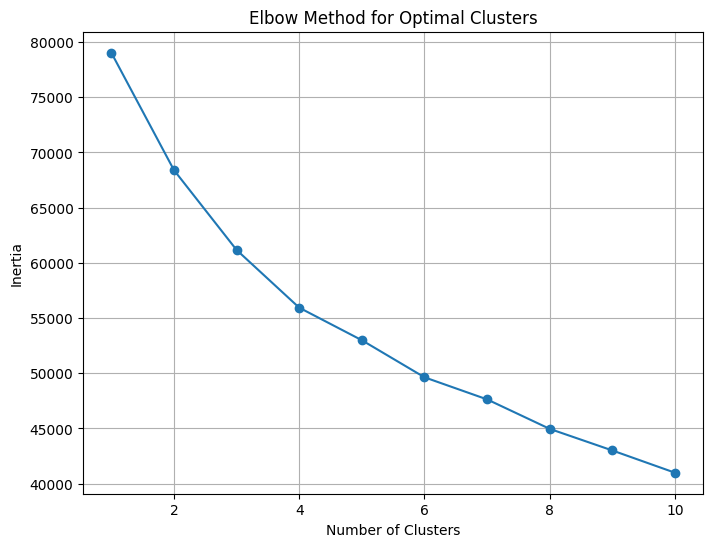

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Ploting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.grid(True)
plt.show()


In [3]:

optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataframe
combined_df['Cluster'] = clusters



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


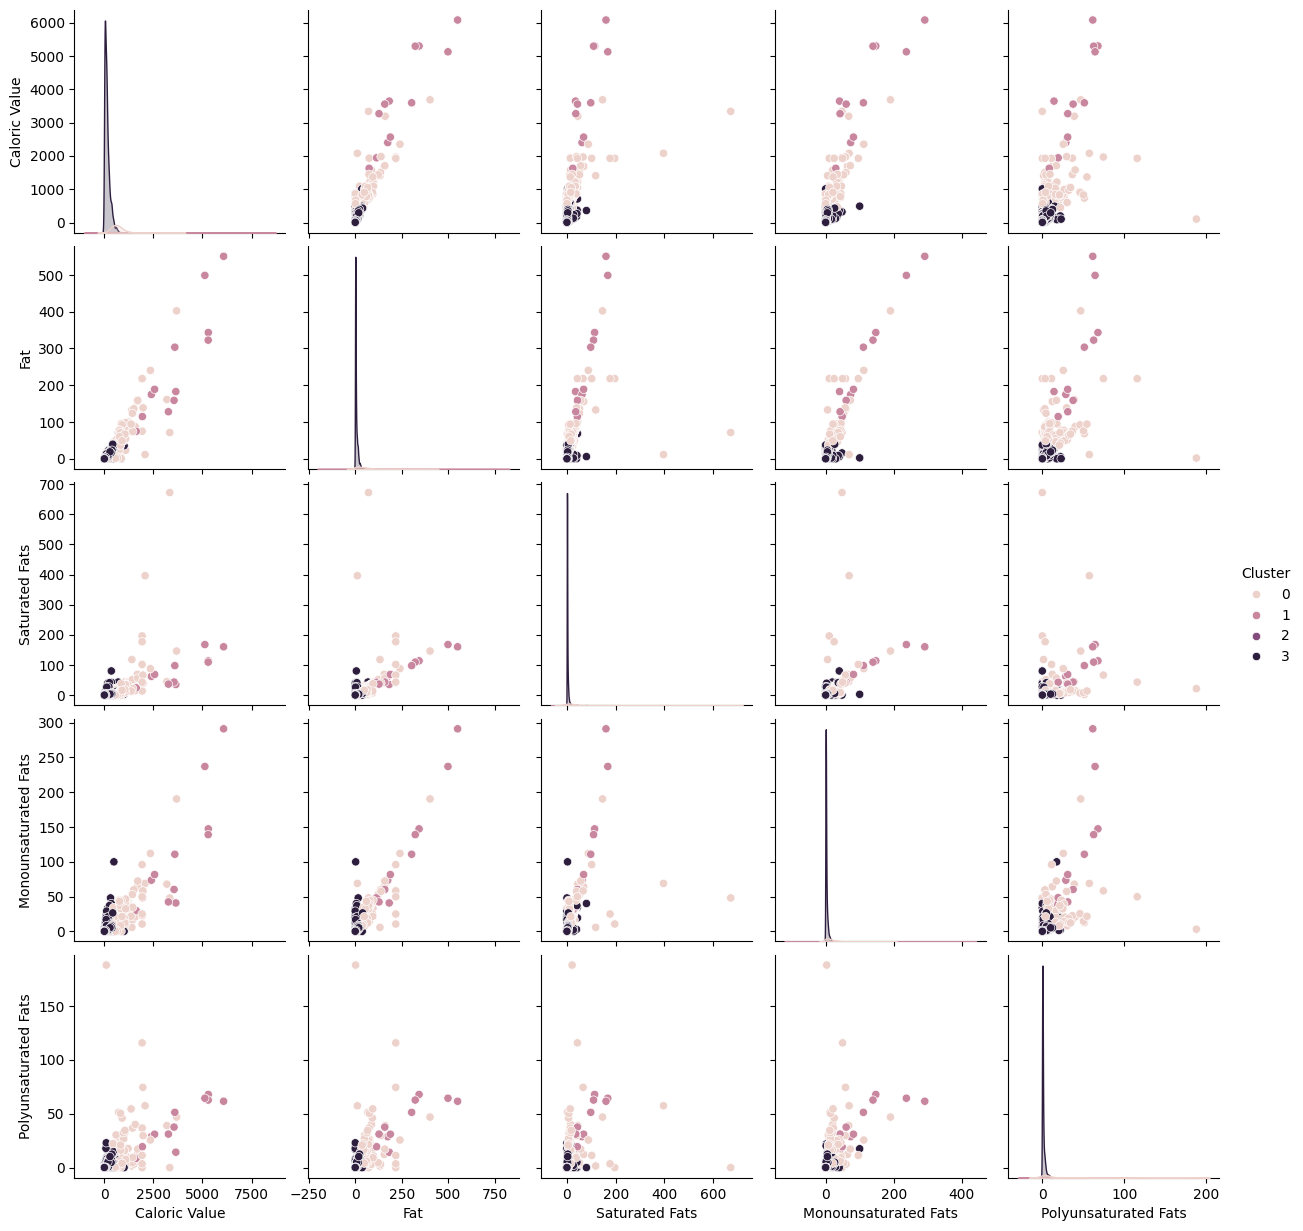

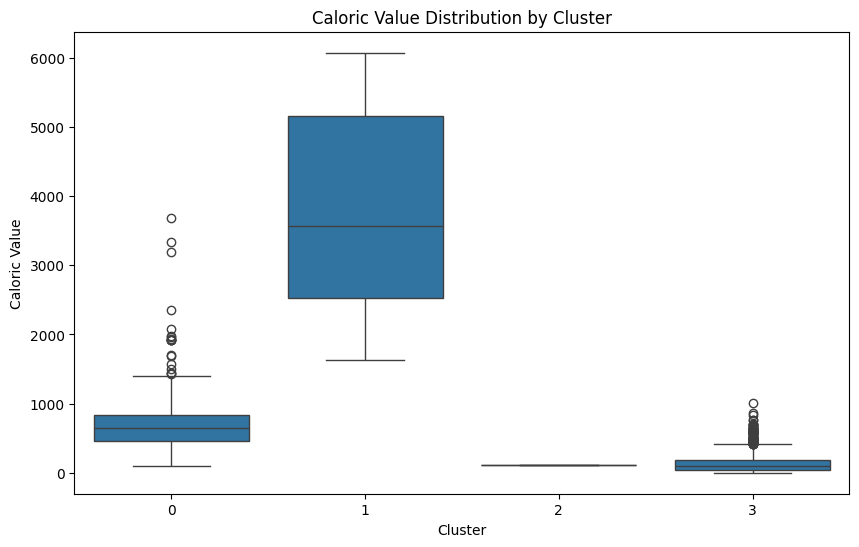

In [4]:
import seaborn as sns

# Visualizing clusters with a pairplot
sns.pairplot(combined_df, hue='Cluster', vars=nutritional_columns[:5])  # Adjust 'vars' to choose different features
plt.show()

#  Boxplot to compare clusters across a specific nutrient
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Caloric Value', data=combined_df)
plt.title('Caloric Value Distribution by Cluster')
plt.show()


In [6]:
# Calculate mean values of each cluster for key nutritional features
# Select only numerical columns for mean calculation
numerical_columns = combined_df.select_dtypes(include=['number']).columns
cluster_means = combined_df[numerical_columns].groupby('Cluster').mean()

# Display the cluster means for interpretation
print(cluster_means)

         Unnamed: 0.1  Unnamed: 0  Caloric Value         Fat  Saturated Fats  \
Cluster                                                                        
0          310.632143  310.632143     733.989286   41.262500       17.959643   
1          522.750000  522.750000    3698.333333  253.525000       80.008333   
2           36.000000   36.000000     110.000000    3.500000        0.500000   
3          265.828735  265.828735     136.023311    4.649324        1.622681   

         Monounsaturated Fats  Polyunsaturated Fats  Carbohydrates    Sugars  \
Cluster                                                                        
0                   15.690364              8.578571      37.177604  5.525357   
1                  108.483333             39.875000       0.000000  0.000000   
2                    0.000000              0.000000       2.100000  1.000000   
3                    2.000439              1.082569      16.226868  4.342300   

            Protein  ...     Calcium  

In [7]:
# Assume subscription revenue based on cluster engagement
# Hypothetical: Cluster 0 - Basic Plan, Cluster 1 - Premium Plan, etc.
revenue_per_user = [5, 10, 15, 20]  # Revenue in dollars per user per month

# Estimate number of users in each cluster (using a sample user base)
user_counts = combined_df['Cluster'].value_counts()
estimated_revenue = sum(user_counts[i] * revenue_per_user[i] for i in range(optimal_clusters))

# Print the estimated monthly revenue
print(f"Estimated Monthly Revenue: ${estimated_revenue}")


Estimated Monthly Revenue: $43575


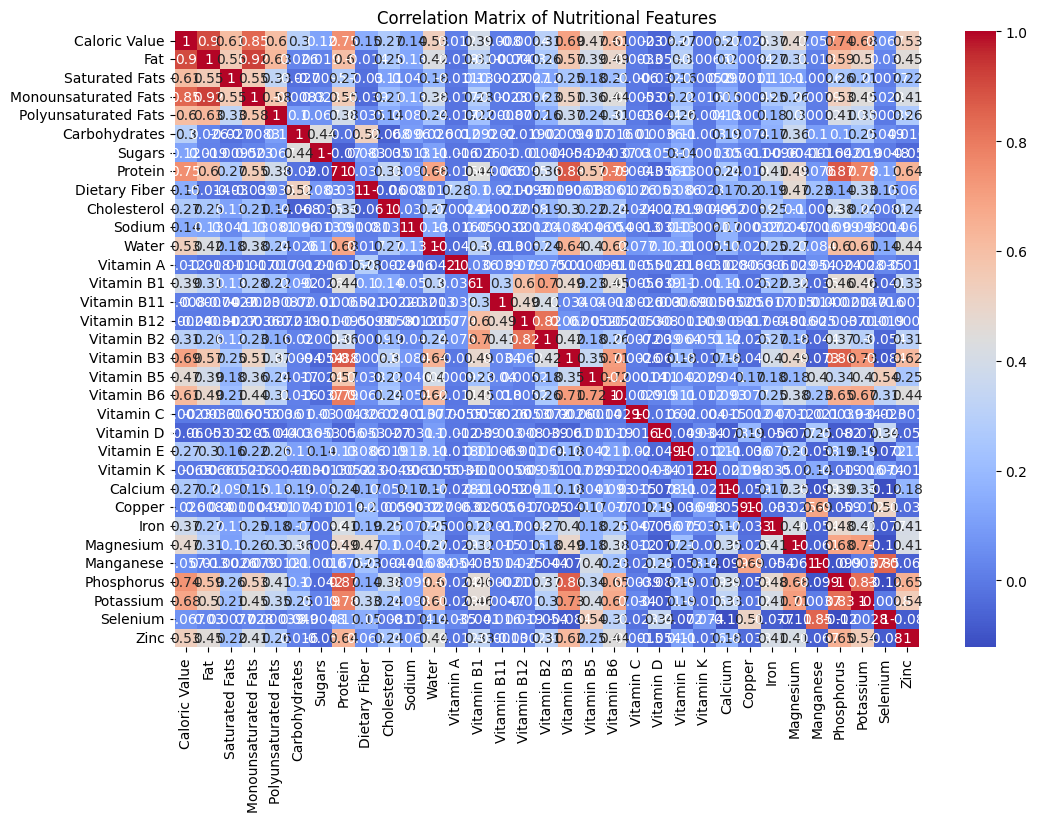

In [8]:
# Heatmap to visualize correlations between nutrients in each cluster
plt.figure(figsize=(12, 8))
sns.heatmap(combined_df[nutritional_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Nutritional Features')
plt.show()
